In [4]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

F1 API Key- Gotten from ergast.com

This is a free API and does not require a private API key

In [5]:
f1_base = "https://ergast.com/api/f1"
# This code, when added to the f1_base api, lets us choose which driver
# Before adding results, we retrieve information on Hamilton directly. 
# Adding /results returns the results and stats on Hamilton's races
hamilton = '/drivers/hamilton/results.json'

# Limit lets us choose how much data we want our api to return
params = {'limit': 500}

# Combine the Base URL and our Racer's specifics
ham_url = f1_base + hamilton
ham_data = []
r = requests.get(ham_url, params = params)
if r.ok:
    ham_stats = r.json()
    # ham_stats['MRData']['RaceTable']['Races'] works through different tables/steps to get us to the right information
    ham_stats2 = ham_stats['MRData']['RaceTable']['Races']
    # The loop below gathers data from each race and adds it to lists which will be converted into our df
    for i in range(0, len(ham_stats2)):
        seasons = ham_stats2[i]
        race_stats = seasons['Results'][0]

        ham_list = {'Date': pd.to_datetime(seasons['date']),
                    'Season': seasons['season'],
                    'Race': seasons['raceName'],
                    'Team': race_stats['Constructor']['name'],
                    'Position': int(race_stats['position']),
                    'Starting Grid Position': int(race_stats['grid']),
                    'Time': race_stats['Time']['time'] if ('Time' in race_stats and 'time' in race_stats['Time']) else 'NA', # Time is filled in as NA if not recorded- Represents a non-finished race
                    'Avg Speed': float(race_stats['FastestLap']['AverageSpeed']['speed']) if ('FastestLap' in race_stats and 'AverageSpeed' in race_stats['FastestLap'] and 'speed' in race_stats['FastestLap']['AverageSpeed']) else 0} 
        # Avg Speed is marked as NA if there was not an average speed recorded for that race
        ham_data.append(ham_list)
    ham_df = pd.DataFrame(ham_data)
    # Replacing 'Grand Prix' with "GP" for simplicity :)
    ham_df['Race'] = ham_df['Race'].replace(' Grand Prix', ' GP', regex=True)
    ham_df.to_csv('hamilton_stats.csv', index = False)
    
  

Grab 10 rows- 5 from the beginning, 5 from the end

In [6]:
ham_table_10 = pd.concat([ham_df.head(5), ham_df.tail(5)])

ham_table = ham_table_10.to_html(index = False)

# Save HTML table to a file
with open("hamilton_stats_table.html", "w") as file:
    file.write(ham_table)

#### Hamilton's Positions over the Years
How has Hamilton's ending position in his races changed over the years?

c:\Users\jessa\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jessa\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


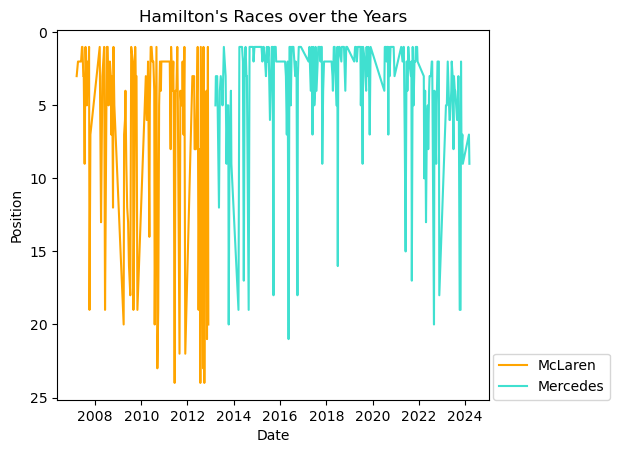

In [24]:
team_cols = {'McLaren': 'orange', 
             'Mercedes': 'turquoise'}
sns.lineplot(data = ham_df, x = "Date", y = 'Position', hue ="Team", palette= team_cols)

# Flip the y-axis so higher positions are at the top 
plt.gca().invert_yaxis()
plt.title("Hamilton's Races over the Years")
plt.legend(loc = (1.01, 0))
plt.subplots_adjust(right=0.8);  # Increase the right margin to make room for the legend

plt.savefig("Hamilton_races.png")


#### Hamilton's Ending Position vs Starting Position
What effect does starting position have on Hamilton's ending position in a race?

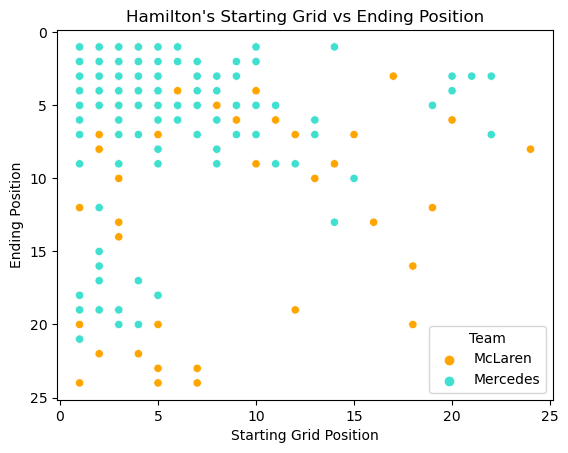

In [19]:
team_cols = {'McLaren': 'orange', 
             'Mercedes': 'turquoise'}
sns.scatterplot(data = ham_df, x = "Starting Grid Position", y = 'Position', hue ="Team", palette= team_cols)

# Flip the y-axis so higher positions are at the top 
plt.gca().invert_yaxis()
plt.title("Hamilton's Starting Grid vs Ending Position")
plt.ylabel("Ending Position");

plt.savefig("Hamilton_position.png")

This graph is interesting as it shows that starting position's affect on the overall position of a race varies. This makes sense when you consider how many factors go into each race and the elements that can influence the outcome despite where you start. Still, we see an obvious trend of a high starting position often resulting in a high End Position

#### Distribution of Hamilton's Race Positions
What is the distribution of Hamilton's ending race positions during his F1 career?

c:\Users\jessa\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


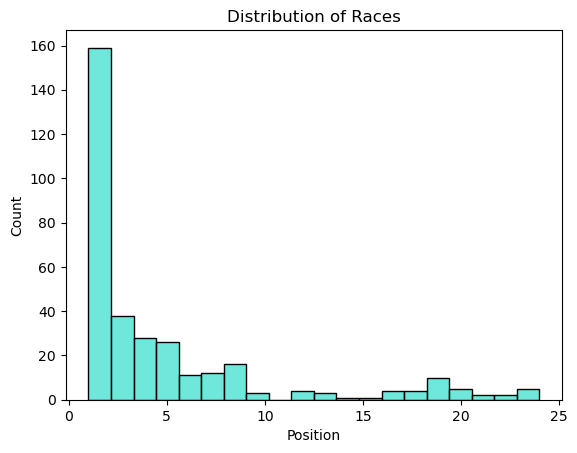

In [18]:
sns.histplot(data = ham_df, x = "Position", color = "turquoise")
plt.title("Distribution of Races")

plt.savefig("Hamilton_race_dist.png")

#### Hamilton's Avg Speed over Time
How has Hamilton's Avg Speed Changed over time?

c:\Users\jessa\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jessa\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


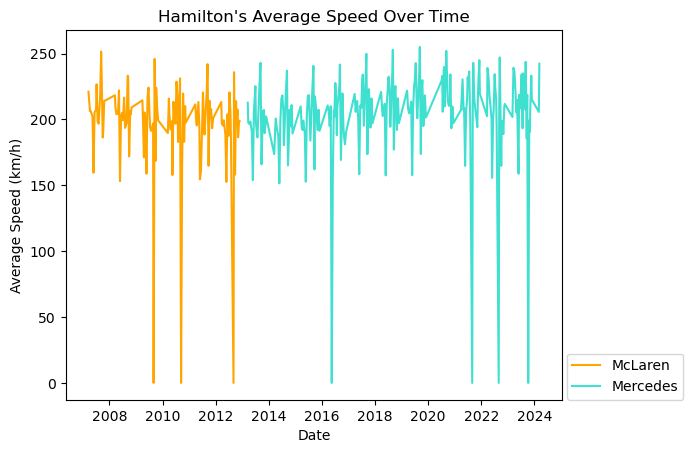

In [16]:
sns.lineplot(data=ham_df, x="Date", y='Avg Speed', hue="Team", palette=team_cols)
plt.title("Hamilton's Average Speed Over Time")
plt.ylabel("Average Speed (km/h)")
plt.legend(loc = (1.01, 0));

plt.savefig("Hamilton_avg_speed.png")